In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

ModuleNotFoundError: No module named 'notebook'

# Week 04 (Monday), AST 8581 / PHYS 8581 / CSCI 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Michael Steinbach <stei0062@umn.edu>, Nico Adams adams900@umn.edu


With contributions totally ripped off from Gautham Narayan (UIUC)


### HW 2 Takeaways

I thought folks did very well. Most everyone got at least Problems 1 and 2 very well. Problem 3 was probably too ambitious (and I think made the HW too long, see below), so it probably won't be appearing again next year. 

### HW Survey Takeaways

*  Almost exactly half reported HW > 9 hours, and half less. This is too long. HW #3 now has only 2 questions, and I am hoping that will shorten the time proportionally. 

* The scores for the instructor support and technology were generally high; I am glad overall the experience has been OK in this sense so far. As always, please reach out to us if there are ways we can improve in these regards.

* The scores for the lectures / in-class exercises were more middling. Thank you in advance for your patience / feedback as we continue to try to better tie these together. Feedback is always welcome at our "Continuous Feedback" form: https://forms.gle/kcyBvnTekwHUXphT7

* HW #3 has been posted; at the end, it has basically the same survey as last week. Please fill it out again if you will, especially the HW time question. This will help us continue to judge HW length.

### Announcements

* Based on feedback, we will move HW due dates to Saturday at midnight. We think this is a good compromise, as this allows you an extra 24 hours to get it done, while still allowing me to get the grading done.

* It was also suggested that one way to better improve the diversity of the skills in the groups beyond simply mingling of areas of study is a self skills-assessment. We have put together one here: https://forms.gle/EtwHdZt5Mbm9SCvcA  (We note that this one does track emails so we can try to distribute folks accordingly.)

* Given the need for lecture content to do HW, I am going to start posting *preliminary* versions of lectures over the weekend. We will likely have to update them before classes, but it will have the important information to make HW doable.

* We are still considering how best to address the projects and project proposal and so on. Thank you in advance for your patience.

# Recap

In the Bayesian view:

* Data ($D$) are random variables with realizations you've observed
* Parameters are random variables that you've not observed
* They are described by a joint distribution. For data $D$ and model parameters $\theta$, $$P(D,\theta) = P(D|\theta)\cdot P(\theta)$$

When testing a scientific model, we **want** to know the probability of the model parameters, given the data we observed: $P(\theta|D)$
* Bayes' rule relates $P(\theta|D)$ and $P(D|\theta)$
* The big difference between the two is the **prior**
    

# Priors

A **prior** is the probability of the parameters *without* any data
* **this is a subjective choice which we get to make!**
* it is your degree of belief in the model
* the posterior is your degree of belief in the model, updated by the data you observed

We generally want to pick a prior that is "weak" or "uninformative"
* In the case of "big" enough data, the prior shouldn't matter
* It is precisely when we do not have big enough data that we rely on the prior      

MLE is a special case of maximum *a posteriori* inference with a uniform/flat prior

 # <center> We already know the prior can alter the inference we make, but just to drive home the point... </center>

## In class warm-up: Is the choice of a uniform prior actually uninformative?

**Task:** Draw 1000 random values for $a$ from a uniform distribution U(-10, 10), which means a top-hat function between -10 and 10. Then, for each $a$, plot the line $y = ax$ (over $-1 < x < 1$).

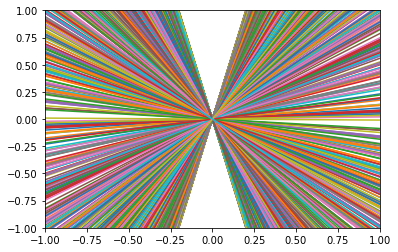

In [4]:
# YOUR CODE HERE  
import numpy as np
import matplotlib.pyplot as plt
a = 10*(np.random.rand(1000)-0.5)



x = np.linspace(-1,1,10)
for m in a: 
    y = m*x
    plt.plot(x,y)
    
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

    



## How to pick a prior 

### Bayesian priors

Priors can be **informative** or **uninformative**.  As it sounds, informative priors are based on existing information (including previously obtained data, but not the data considered right now) that might be available.  Uniformative priors can be thought of as "default" priors, i.e., what your prior is when you never used
any data, e.g, a "flat" prior like $p(\theta|M,I) \propto {\rm C}$.

## Statistical Modeling "Wisdom"

* Build a model for your data (ideally draw a "Probabilistic Graphical Model" or PGM - we'll see more of these)

* Have an objective function (likelihood or posterior) that you optimize (or sample) to fit the the data

    * The objective function evaluates the fit of your one dataset under different parameter values/models
 
* Derive your objective function from modeling assumptions (physical or statistical)

* **Write down your assumptions!!!** (You'll need these when things go wrong)
* *Note: assumptions can be encoded in priors*

## Statistical Modeling "Wisdom"

Four Questions for a Bayesian:

1. What is the model? $P(D|\theta)$

2. What is the likelihood? Derive $L(\theta)$ from your sampling distribution $P(D|\theta)$

3. What are your priors? $P(\theta)$

4. How do you optimize/sample the objective function to model the data?

So far, we've restricted ourselves to inferences with:
* exact solutions - rare!
* linear-izable functions - because these are convex, and minimum is the global minimum!
* low-dimensional parameter spaces - limiting!

We can think of more complicated scenarios:

![Posteriors](figures/posteriors.png)


*Note: sampling these types of distributions becomes more complicated*

# Global Optimizers (use if you have a complex problem but low dimensionality)


A "global optimizer" **finds global minima of functions**. These generally use a two stage approach. The first stage takes large steps in parameter space to avoid getting stuck in local minima. Then, the second stage finds local minima near the best of the big steps.

# Simulated annealing

*Note: Analogy, Start high temperature: large steps in parameter space; cool down, take smaller steps in parameter space*

Simulated annealing mimics the physical process of heating a material and then slowly lowering the temperature to decrease defects, thus minimizing the system energy.

At each iteration of the simulated annealing algorithm, a new point is randomly generated. 

The distance of the new point from the current point, or the extent of the search, is based on a probability distribution 

## $$ P = \exp(-\Delta L/kT) $$



The algorithm accepts all new points that lower the objective, but also, with a certain probability, points that raise the objective. 

By accepting points that raise the objective, the algorithm avoids being trapped in local minima, and is able to explore globally for more possible solutions.

![Simulated Annealing](figures/sim_annealing_flow.png)


An annealing schedule is selected to systematically decrease the temperature as the algorithm proceeds. 

As the temperature decreases, the algorithm reduces the extent of its search to converge to a minimum.

Basin-hopping algorithm is a stochastic algorithm that seeks a global minimum by combining random perturbation of the positions and local minimization.

`scipy.optimize.basinhopping`

![Basin Hopping](figures/basin_hopping.jpg)

Simplicial homology global optimization (SHGO) is another good option, particularly since it also returns all other local and global minimum in addition to the global minimum. 

It's using "novel, rigorously proven" methods that detect the homological properties of the objective function surface). 

![SHGO](figures/shgo.svg)

## Use Basin-hopping, simulated annealing and SHGO to solve the eggholder problem

Text(0.5, 0, 'eggholder(x, y)')

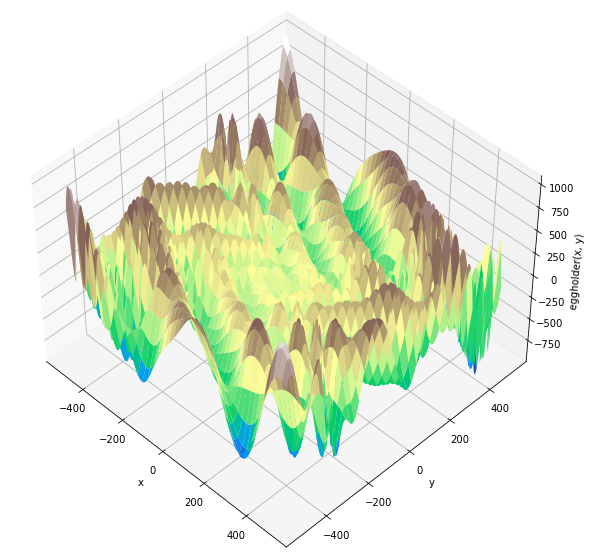

In [10]:
# RUN THIS (copied from below to be able to run the example)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize


def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))\
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')


In [11]:
import scipy.optimize as optimize
import scipy.stats as st
class MyBounds(object):
    def __init__(self, xmax=[512, 512], xmin=[-512,-512] ):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin

bounds = MyBounds()
res1 = optimize.basinhopping(eggholder, [st.uniform.rvs(loc=-512, scale=1024, size=2)],\
                             niter=10000, T=1, accept_test=bounds, seed=42)
print('Basin Hopping')
print(res1)

/home/andrea/anaconda3/envs/astro/lib/python3.8/site-packages/scipy/optimize/optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))
/home/andrea/anaconda3/envs/astro/lib/python3.8/site-packages/scipy/optimize/optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))
/home/andrea/anaconda3/envs/astro/lib/python3.8/site-packages/scipy/optimize/optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))
/home/andrea/anaconda3/envs/astro/lib/python3.8/site-packages/scipy/optimize/optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))
/home/andrea/anaconda3/envs/astro/lib/python3.8/site-packages/scipy/optimize/optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))
/home/andrea/anaconda3/envs/astro/lib/python3.8/site-package

Basin Hopping
                        fun: -956.9182316246656
 lowest_optimization_result:       fun: -956.9182316246656
 hess_inv: array([[0.19437119, 0.19489326],
       [0.19489326, 0.21546762]])
      jac: array([7.62939453e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 11
     njev: 20
   status: 0
  success: True
        x: array([482.35331067, 432.87899919])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 1659
                       nfev: 578313
                        nit: 10000
                       njev: 189854
                          x: array([482.35331067, 432.87899919])


In [12]:
print('-------------')
res2 = optimize.shgo(eggholder, bounds=[(-512, 512), (-512, 512)], n=30, sampling_method='sobol')
print('SHGO')
print(res2)

-------------
SHGO
     fun: -959.6406627208441
    funl: array([-959.64066272, -718.16745962, -704.80659592, -565.99778097,
       -559.78685655, -557.36868733, -507.87385942, -493.9605115 ,
       -426.48799655, -421.15571437, -419.31194957, -410.98477763,
       -202.53912972])
 message: 'Optimization terminated successfully.'
    nfev: 559
     nit: 2
   nlfev: 499
   nlhev: 0
   nljev: 133
 success: True
       x: array([512.        , 404.23180276])
      xl: array([[ 512.        ,  404.23180276],
       [ 283.07593402, -487.12566542],
       [-294.66820039, -462.01964031],
       [-105.87688985,  423.15324143],
       [-242.97923629,  274.38032063],
       [-506.25823477,    6.3131022 ],
       [-408.71981195, -156.10117154],
       [ 150.23210485,  301.31378508],
       [  91.00922754, -391.28375925],
       [ 202.8966344 , -269.38042147],
       [ 361.66625957, -106.96490692],
       [-219.40615102, -244.06022436],
       [ 151.59603137, -100.61082677]])


# Curse of Dimensionality

![Curse of Dimensionality](figures/ndim.png)

In general, evaluating the posterior throughout the entire parameter space is too costly. 

We want to focus resources on mapping the posterior where it is non-tiny. 

**Generating samples from the posterior itself automatically accomplishes this.**

### Sampling and numerical integration

Almost always, we are ultimately interested in *integrals* of the posterior, i.e. marginal distributions of parameters. The tasks of Monte Carlo sampling and **Monte Carlo integration** are essentially indistinguishable. (Similar machinery is useful for difficult optimization problems.)

The essence of MC integration:

$\int w(x)\,p(x)\,dx = \int w(x)\,dP(x) \approx \overline{w(x_i)}; ~ x_i\sim P$

i.e., if we can factor the integrand into a PDF and a weight, and sample from the PDF, then our integral becomes an _average over the samples_.

In other words, given a list of samples of $\theta$ from $p(\theta)$,
* the marginalized 1D posterior for $\theta_0$ is estimated by making a histogram of $\theta_0$ samples
* the marginalized 2D posterior for $\theta_0,\theta_1$ is estimated from a 2D histogram of $\theta_0,\theta_1$ samples
* statistics like the mean or percentiles of the posterior are estimated directly from the samples

All of these computations would be weighted if $w(\theta)\neq1$.

# Simple Example

Area of a rectangle = Base $\times$ Height
Area of a triangle = 1/2 Base $\times$ Height
What about the area of this?

![Messy Area](figures/messy_area.png)

![Conditional probability](figures/conditional_prob2.png)

## Simple Monte Carlo

A posterior is already naturally factored into a likelihood function, $p(x|\theta)$, and a prior PDF, $p(\theta)$:

$p(\theta|x) \propto p(x|\theta)\,p(\theta)$

Applying this in the MC integration context leads to the Simple Monte Carlo algorithm:

```
while we want more samples
    draw theta from p(theta)
    compute weight = p(x|theta)
    store theta and weight
```

Obtaining marginal distribution(s) for $\theta$ then reduces to constructing weighted histograms of the samples.

**This can be slow.**
SMC is indeed simple (as long as the prior is simple to draw from), but if the priors are not very informative then it still wastes many likelihood evaluations where the posterior is small. However, refinements of this approach lead to some of the advanced algorithms we'll cover later.

For now, we'll focus on the most common methods, which use a unit weight function (i.e. obtain draws directly from the posterior).

But first, a bit more context re: random number generation.

## Random number generation
Useful terms to know:

* Random: predictable only in the sense of following a PDF

* Pseudorandom: not random, but "unpredictable enough" for practical purposes. Various computer algorithms produce pseudorandom sequences that approximate the uniform distribution on [0,1).

* Quasirandom: sequence that doesn't even pretend to be random, but does converge to a target PDF *more quickly* than a random or pseudorandom process would

Here we assume that we have a reliable source of uniform pseudorandom numbers, and want to turn these into samples of another PDF.

Two simple approaches are
1. Rejection sampling
2. Inverse Transform

# # In class exercise - global minimization

Let's create a complicated likelihood function with 2 parameters.

Then, we'll use the Nelder-Mead method in `scipy.optimize` to determine minimum of this function.

Text(0.5, 0, 'eggholder(x, y)')

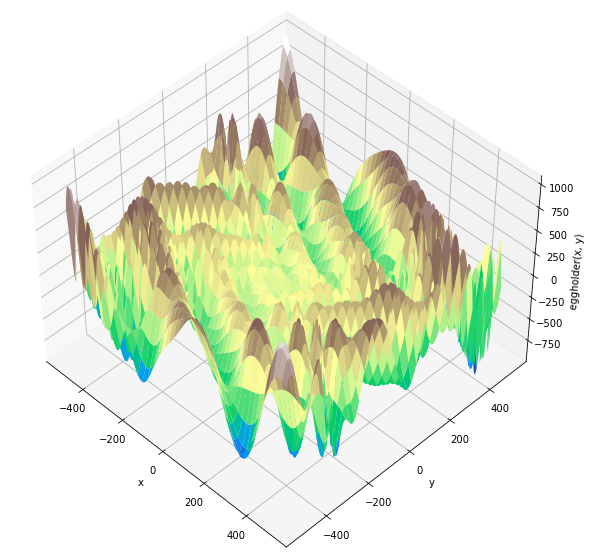

In [13]:
# RUN THIS
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize


def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))\
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')


* Use optimize.minimize to try to find the minimum
* try it 10 times with different starting guesses
* print out the minimum value, and the x, y location of the minimum
* since you already have the true function, get the minimum value 
* and the location of the minimum of your x, y grid

In [37]:
# YOUR CODE HERE
import scipy.optimize as optimize

min_x, min_y, min_fun = None, None, np.inf
for i in range(-500,500,50): #x guess
        for j in range(-500,500,50): #y guess
            res = optimize.minimize(eggholder,[i,j])
            print(i,j,res.x, res.fun)
            if res.fun < min_fun and res.x[0] <500 and res.x[0] >-500 and res.x[1] <500 and res.x[1] >-500:
                min_x,min_y = res.x[0], res.x[1]
                min_fun = res.fun
                
print("global min",min_x, min_y, min_fun)

# What do you notice happens to the minimum value based on your starting guess?

-500 -500 [-390.37391393 -415.09014735] -753.0501546930284
-500 -450 [-456.88579718 -382.62335946] -786.5259940788349
-500 -400 [-456.88576863 -382.62333492] -786.5259940786202
-500 -350 [-456.88581331 -382.62338159] -786.5259940788587
-500 -300 [-576.80349654 -324.53902214] -847.0659697839259
-500 -250 [-576.80342121 -324.53893101] -847.0659697832755
-500 -200 [-408.71977404 -156.1011535 ] -507.87385942090566
-500 -150 [-408.71985919 -156.10120001] -507.8738594207772
-500 -100 [-596.74975975  -86.65527811] -613.9960433660394
-500 -50 [-506.25822603    6.31311721] -557.3686873304439
-500 0 [-506.25830407    6.31310737] -557.3686873300188
-500 50 [-506.25821781    6.31312002] -557.3686873304202
-500 100 [-414.81569733   98.73013864] -557.8577790251626
-500 150 [-506.25824638    6.31312373] -557.3686873304151
-500 200 [-599.44182863  250.25362341] -893.7160793874037
-500 250 [-556.9754056   293.17551115] -893.9448470230394
-500 300 [-556.97545161  293.17552625] -893.9448470226318
-500 35

-150 450 [-105.87693225  423.15325727] -565.9977809709021
-100 -500 [-176.77118895 -520.0755961 ] -645.2782111301328
-100 -450 [-176.77113759 -520.07558545] -645.2782111304929
-100 -400 [  91.00924706 -391.2837763 ] -426.4879965472293
-100 -350 [ -15.65786158 -342.77658493] -306.0640793636673
-100 -300 [-123.72760406 -290.31838296] -362.41355122356003
-100 -250 [-123.72762533 -290.31839327] -362.4135512235208
-100 -200 [ -70.88617756 -139.66067101] -158.6881676613604
-100 -150 [ -70.88617681 -139.66067083] -158.68816766135876
-100 -100 [-101.28997431 -125.7670863 ] -174.3707857442363
-100 -50 [-123.46078986  -45.57133638] -122.89314472798326
-100 0 [-86.07840871  -6.42281532] -123.79416260700644
-100 50 [-46.45095769  38.12489361] -126.42383220953323
-100 100 [-162.83853676   96.13032807] -302.28160328322696
-100 150 [-76.14598053 191.15514232] -306.7204678431298
-100 200 [-76.1459827  191.15514741] -306.7204678431449
-100 250 [-76.14594014 191.15513032] -306.72046784319036
-100 300 [-

250 350 [150.23210602 301.31378963] -493.96051150336154
250 400 [347.32695583 499.41538313] -888.9491252698367
250 450 [347.32690934 499.41536544] -888.9491252692867
300 -500 [ 283.07591327 -487.12565907] -718.1674596221529
300 -450 [ 283.07589673 -487.12566141] -718.1674596221276
300 -400 [ 283.07597943 -487.12565538] -718.167459621679
300 -350 [ 399.55877572 -367.69105182] -716.6715003418769
300 -300 [ 399.55877719 -367.69105152] -716.6715003418851
300 -250 [ 296.57079877 -173.08327016] -419.826422627979
300 -200 [ 267.37577555 -202.89895108] -420.13950973676793
300 -150 [ 296.57078418 -173.08326179] -419.8264226279251
300 -100 [ 361.66623899 -106.96494523] -419.311949573609
300 -50 [ 296.57080403 -173.08327285] -419.82642262797714
300 0 [276.85657953  28.91200487] -343.15559054572907
300 50 [276.85657501  28.91200232] -343.1555905457441
300 100 [276.8565314   28.91197267] -343.1555905457097
300 150 [324.99188148 216.04755556] -582.3062800548842
300 200 [324.99190754 216.04757653] -5

# In class exercise - rejection sampling

In this exercise, we are going to estimate the value of $\pi$ using rejection sampling.

1. First, draw x, y points from a uniform distribution between 0 and 1. Use 3 sample sizes: [10, 10^3, 10^5]
2. Next, calculate $r = sqrt(x^2 + y^2)$ for each point. Reject the point if r > 1, else accept it.
3. Plot the accepted points in red and the rejected points in blue in the x-y plane
4. Finally, estimate $\pi$. Use the proportion of **accepted points / total points** and some algebra.

Here is an example of a plot for step 3:

![Example rejection sampling plot](figures/example_rejection_sampling_plot.png)

In [39]:
# YOUR CODE HERE
sample_sizes = [10,10**3, 10**5]


for size in sample_sizes:
    accepted_cnt = 0
    for i in range(size):
        x = np.random.rand()
        y = np.random.rand()
        r = x**2 + y**2
        if r<=1:
            accepted_cnt +=1
    #        plt.scatter(x,y,c='red')
    #    else:
    #        plt.scatter(x,y,c='blue')
    #plt.show()
    print(4*accepted_cnt/size)

2.8
3.22
3.14916


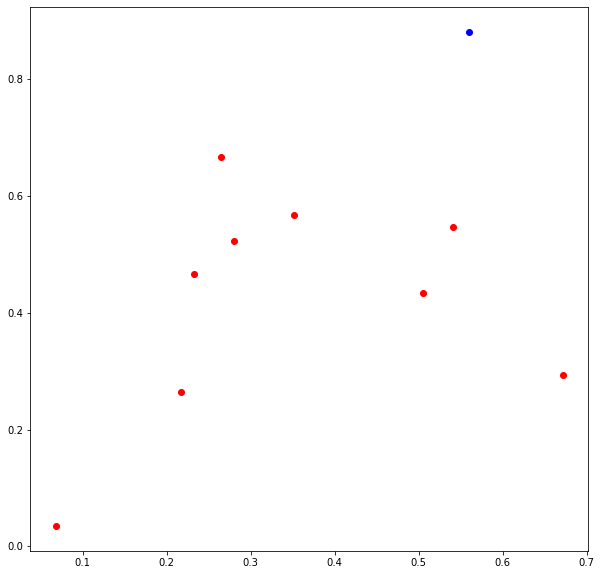

3.6


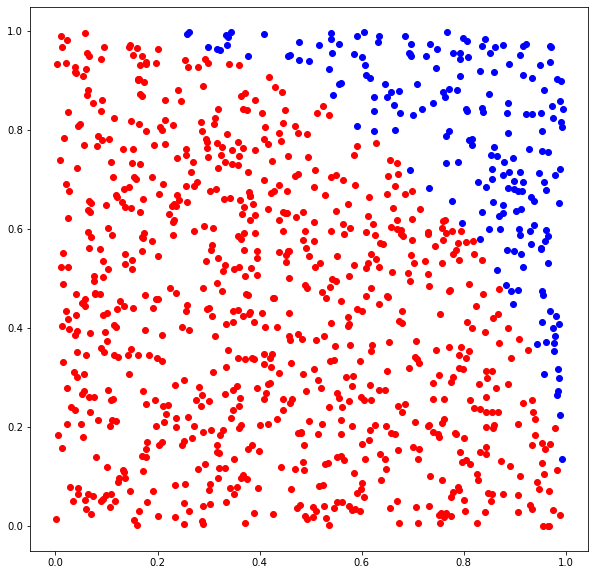

3.212


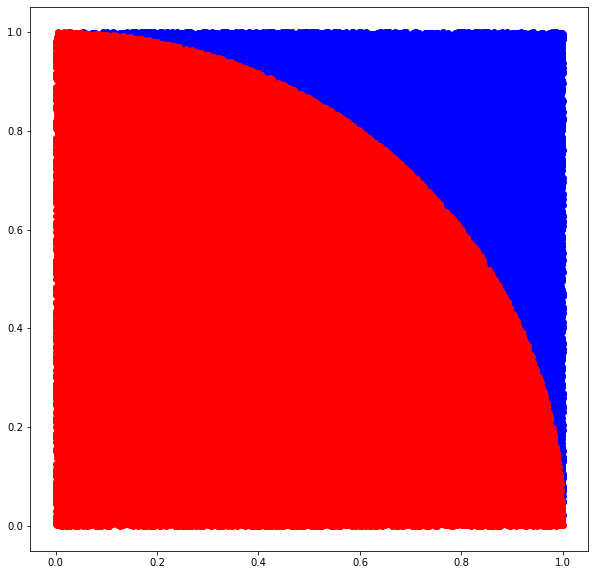

3.14672


In [40]:

# YOUR CODE HERE
sample_sizes = [10,10**3, 10**5]


for size in sample_sizes:
    accepted_cnt = 0
    #for i in range(size):
    x = np.random.rand(size)
    y = np.random.rand(size)
    r = x**2 + y**2
    plt.plot(x[r>1],y[r>1],'bo') 
    plt.plot(x[r<=1],y[r<=1],'ro') 
    accepted_cnt = x[r<=1].size
    plt.show()
    print(4*accepted_cnt/size)